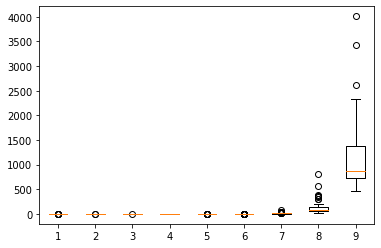

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def data_to_dict(line):
    d = {}
    a = line.split(" ")

    d["user"] = float(a[0][:-4])
    
    time = a[2][:-7].split(":")
    d["elapsed"] = int(time[-2]) * 60 + float(time[-1])
    if (len(time) == 3):
        d["elapsed"] += int(time[-3]) * 3600

    return d


def times_box_plot_data(times_file_path, min_crossings, max_crossings):
    data = [[] for i in range(max_crossings + 1)]

    crossings = -1
    diff_time = 0
    eig_time = 0
    idx = 0
    with open(times_file_path) as file:
        for line in file:
            if idx == 0:
                crossings = int(line.split(" ")[1])
            elif idx == 1:
                pass
            elif idx == 2:
                diff_time = data_to_dict(line)["elapsed"]
            elif idx == 3:
                pass
            elif idx == 4:
                eig_time = data_to_dict(line)["elapsed"]
            else:
                data[crossings].append(diff_time + eig_time)

                crossings = -1
                diff_time = 0
                eig_time = 0
                idx = -1
                
            idx += 1
            
    return data[min_crossings:]

data = times_box_plot_data("./run_all__pd_codes_TIMES4-12", 4, 12)

fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

In [6]:
data_to_dict("15526.24user 240.07system 1:06:45elapsed 393%CPU 803685context_switch 3832waits")

{'user': 15526.24, 'elapsed': 4005.0}